# 因子分析を用いた知覚マップ作成: アンケートデータ分析の第一歩

## 0. はじめに
### 0.1. ゴール
アンケートデータからビール市場における知覚マップを作成して，自社商品のポジショニングを見てみます．競合の商品と比較して，今後とるべきマーケティング戦略まで考えてみましょう！
### 0.2. データ
アサヒ，キリン，サッポロ，エビス，サントリーの5社の商品（計10品）を対象とした，6つの項目に関するアンケートデータを使います．（各項目は5段階評価）なお、分析に使用するデータは事前に商品ごとの平均値で集計されています．

- **アサヒ**
 - アサヒスーパードライ（ビール）: Asahi Super Dry
 - アサヒ本生ドラフト（発泡酒）: Asahi Honnama Draft
- **キリン**
 - キリンラガービール（ビール）: Kirin Lagar Beer
 - キリン一番絞り（ビール）: Kirin Ichiban Shibori
 - 麒麟淡麗<生>（発泡酒）: Kirin Tanrei
 - キリンのどごし（発泡酒）: Kirin Nodogoshi
- **サッポロ**
 - サッポロ生ビール黒ラベル（ビール）: Sapporo Nama Beer Kurolabel
- **エビス**
 - エビスビール（ビール）: Ebisu
- **サントリー**
 - サントリー・ザ・プレミアムモルツ（ビール）: Suntory The Premium
 - サントリー金麦（発泡酒）: Suntory Kinmugi


### 0.3. 分析の流れ
**1. データの読み込み**
: 分析で使うデータがどんなデータなのかを確認します．

**2. データの前処理**
: 因子分析をするために，必要な処理をしていきます．メインは共通因子の数を決めることです．

2.1. 分析に必要なデータを抽出

2.2. 相関行列から固有値を算出

2.3. 共通因子数の決定

**3. 因子分析**
: 共通因子を見つけにいきます．

3.1. 正規化

3.2. 因子負荷量の算出

3.3. 共通因子の解釈

**4. 結果の解釈**
: 商品ごとに因子を見ていき，知覚マップを作成します．

4.1. 因子得点の算出

4.2. 知覚マップ作成

### 0.4. 分析イメージ

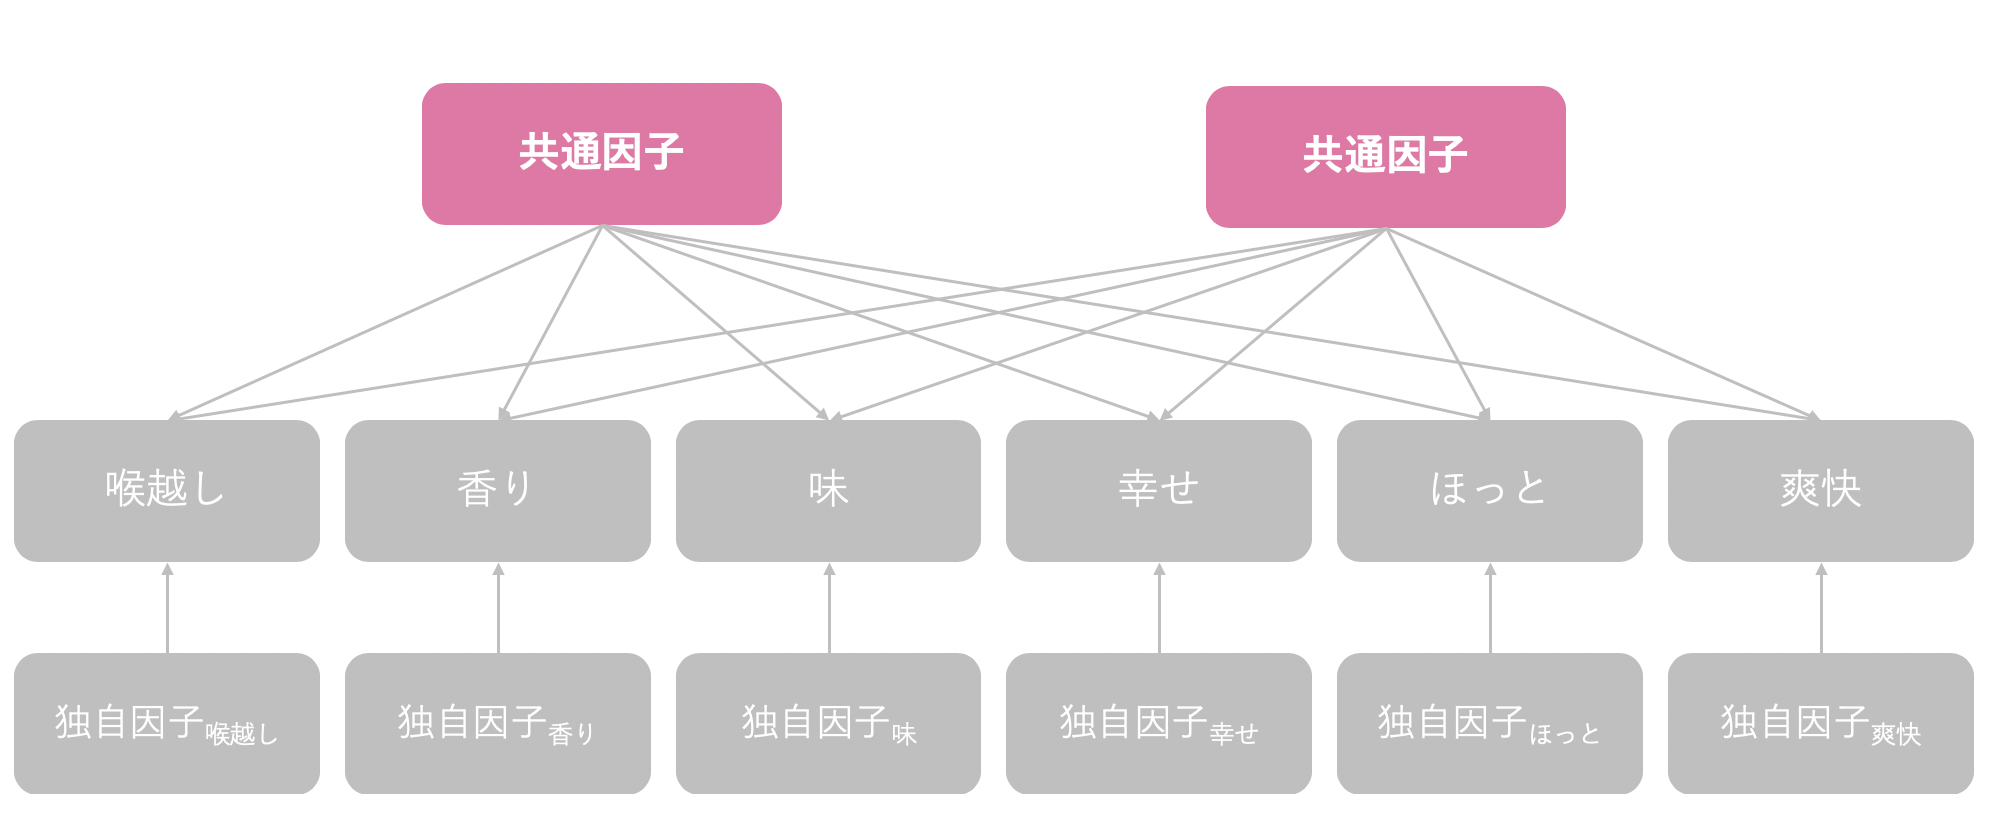

## 1. データの読み込み
いつも通りですね．```pd.read_csv()```で読み込んで，```head()```でデータを見てみましょう．


In [4]:
import pandas as pd
df = pd.read_csv('Beerdata.csv')
df

,商品名,喉越しが良い,香りが良い,味が良い,幸せな気分になる,ほっとした気分になる,爽快な気分になる
0,アサヒスーパードライ,4.08,3.47,3.72,3.53,3.42,3.90
1,キリンラガービール,3.72,3.70,3.73,3.53,3.54,3.58
2,キリン一番絞り,3.97,3.93,4.00,3.76,3.75,3.80
3,サッポロ生ビール黒ラベル,3.68,3.68,3.68,3.55,3.56,3.56
4,エビスビール,3.85,4.08,4.09,3.90,3.81,3.60
5,サントリー・ザ・プレミアムモルツ,3.95,4.02,4.04,3.92,3.86,3.82
6,アサヒ本生ドラフト,3.52,3.26,3.30,3.31,3.32,3.45
7,麒麟淡麗<生>,3.72,3.29,3.39,3.32,3.35,3.53
8,キリンのどごし,3.62,3.28,3.29,3.30,3.33,3.47
9,サントリー金麦,3.31,3.28,3.26,3.26,3.31,3.23


## 2. データの前処理
### 2.1. 分析に必要なデータを抽出
因子分析ではアンケートの評価データ（数値）だけを使うので，商品名を抜いたデータを作成します．特定の列を削除する場合には```drop()```を使います．列を削除するので，```axis = 1```です．行を操作する場合には，```axis = 0 ```です．```drop()```の詳しい説明は[こちら](https://note.nkmk.me/python-pandas-drop/)から．

In [7]:
df2 = df.drop('商品名',axis = 1)
df2

,喉越しが良い,香りが良い,味が良い,幸せな気分になる,ほっとした気分になる,爽快な気分になる
0,4.08,3.47,3.72,3.53,3.42,3.90
1,3.72,3.70,3.73,3.53,3.54,3.58
2,3.97,3.93,4.00,3.76,3.75,3.80
3,3.68,3.68,3.68,3.55,3.56,3.56
4,3.85,4.08,4.09,3.90,3.81,3.60
5,3.95,4.02,4.04,3.92,3.86,3.82
6,3.52,3.26,3.30,3.31,3.32,3.45
7,3.72,3.29,3.39,3.32,3.35,3.53
8,3.62,3.28,3.29,3.30,3.33,3.47
9,3.31,3.28,3.26,3.26,3.31,3.23


### 2.2. 相関行列から固有値を算出
因子分析では共通因子の数を決めるために，まず各アンケート項目の固有値を計算することが必要になります．この固有値は各アンケート項目間の相関を示す相関行列から算出されます．相関行列は```corr()```で計算されます．

In [9]:
cor = df2.corr()
cor

,喉越しが良い,香りが良い,味が良い,幸せな気分になる,ほっとした気分になる,爽快な気分になる
喉越しが良い,1.000000,0.623354,0.778155,0.716951,0.630211,0.978844
香りが良い,0.623354,1.000000,0.971400,0.977696,0.988987,0.587296
味が良い,0.778155,0.971400,1.000000,0.980141,0.957853,0.743062
幸せな気分になる,0.716951,0.977696,0.980141,1.000000,0.983663,0.686996
ほっとした気分になる,0.630211,0.988987,0.957853,0.983663,1.000000,0.603937
爽快な気分になる,0.978844,0.587296,0.743062,0.686996,0.603937,1.000000


相関行列は数字がごちゃごちゃして見づらいですよね．そんな時にはヒートマップで可視化してあげます．```seaborn```ライブラリの```sns.heatmap()```で作成出来ます．引数などの詳細は[こちら](https://qiita.com/Tom-tom-tom/items/f0e7800fbe72fd729a8d)を参考にどうぞ．初めて```japanize_matplotlib```を使用する人でAnaconda環境の場合は[このサイト](https://ai-inter1.com/matplotlib-japanize/)の**japanize_matplotlibの利用による日本語対応**を参考にして設定してみてください．ダイレクトにPythonの環境を作っている人はターミナルあるいはコマンドプロンプトで```pip install japanize-matplotlib```とうってください。時間がある時にゆっくりやりたい人あるいはうまく行かない方はBeerdata_E.csvというデータを代わりに使いましょう。英語ver.です．

/Users/k.fukada/.local/share/virtualenvs/data_science-tXjswaqR/lib/python3.8/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


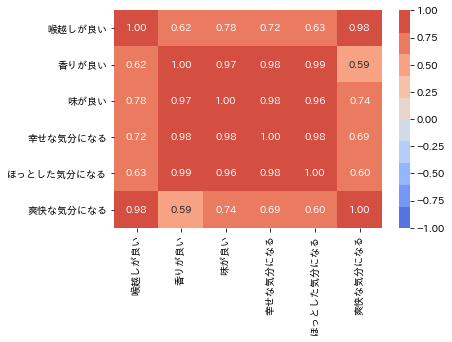

In [11]:
# 相関行列の可視化
import seaborn as sns
import japanize_matplotlib
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

なんとなく2つのグループが見えてきませんか？？

では，相関行列から固有値を計算していきます．ここでの固有値とは，各因子の全てのアンケート項目に対する支配度を示しています．つまり固有値が大きいものほど，情報量のある因子ということになります．因子はそれぞれの項目の数だけ存在するので，固有値は6つ出力されるはずです．

In [12]:
# 必要なライブラリのインポート
import numpy as np
from numpy import linalg as LA
# 相関行列から固有値の算出
eigenv = LA.eigvals(cor)
eigenv

array([5.09068399e+00, 8.51302659e-01, 3.02191631e-02, 1.63721947e-02,
       9.97716606e-03, 1.44483066e-03])

### 2.3. 因子数の決定
今回はスクリープロットという方法で因子の数を決めていきます．固有値をプロットしてみて，ガクッと下がっている数あるいは1を下回る数が最適な因子の数です．```matplotlib```ライブラリの```plot()```コマンドでグラフを作成出来ます．```hlines()```で横方向の直線を引くことが出来ます。```hlines()```の詳しい説明は[こちら](http://nekoyukimmm.hatenablog.com/entry/2015/11/07/130817)から．

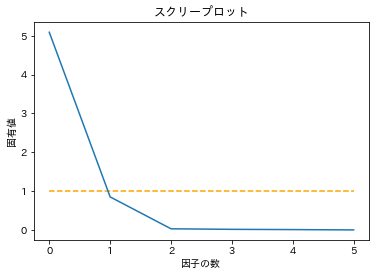

In [19]:
import matplotlib.pyplot as plt
plt.plot(eigenv)
plt.title('スクリープロット')
plt.xlabel('因子の数')
plt.ylabel('固有値')
plt.hlines([1],0,5,'orange', linestyles='--')


**Pythonは0から始まることに注意してください！**つまり，因子の数が0となっていますが，実際には1の時です．グラフのx軸を見てみると1でガクッと下がり，かつ1を下回っているので，因子の数は2個が最適そうですね．

## 3. 因子分析
### 3.1. 正規化
因子分析では，データは標準正規分布に従っているとするので，データを標準化します．標準化に関する説明は[こちら](https://bellcurve.jp/statistics/course/7801.html)を参考にしてください．いろいろ方法はありますが，今回は```sklearn.preprocessing```の```scale```という関数を使用します．

In [21]:
from sklearn.preprocessing import scale
df_scaled = scale(df2)
df_scaled

array([[ 1.54798517, -0.4151603 ,  0.22684748, -0.03380738, -0.51638997,
         1.60999123],
       [-0.10075643,  0.32504799,  0.25925426, -0.03380738,  0.07377   ,
        -0.07365973],
       [ 1.04420301,  1.06525628,  1.13423738,  0.93815473,  1.10654994,
         1.0838503 ],
       [-0.28394994,  0.26068205,  0.09722035,  0.05071107,  0.17212999,
        -0.17888791],
       [ 0.49462248,  1.54800082,  1.42589842,  1.52978384,  1.40162993,
         0.03156846],
       [ 0.95260626,  1.354903  ,  1.26386451,  1.61430228,  1.64752991,
         1.18907849],
       [-1.01672399, -1.09100266, -1.13423738, -0.96351026, -1.00818995,
        -0.75764293],
       [-0.10075643, -0.99445375, -0.84257634, -0.92125104, -0.86064996,
        -0.33673019],
       [-0.55874021, -1.02663672, -1.16664416, -1.00576948, -0.95900995,
        -0.65241475],
       [-1.97848992, -1.02663672, -1.26386451, -1.17480637, -1.05736995,
        -1.91515296]])

### 3.2. 因子負荷量の算出
やっと因子分析です！各アンケート項目に対して因子負荷量を計算していきます．因子負荷量は各項目がどの程度因子の影響を受けているかを表しています．```FactorAnalyzer```を使うと因子分析をすることが出来ます．```n_factors```で共通因子の数を，```rotation```で回転の方法を指定します．anaconda環境の人は```conda install -c desilinguist factor_analyzer```をanaconda promptで実行してみてください．

In [25]:
from factor_analyzer import FactorAnalyzer
# 今回の因子分析の設定をする．まずはpromax回転で分析してみます．
fa_promax = FactorAnalyzer(n_factors = 2, rotation = 'promax')
# データに対して因子分析を実行！
fa_promax.fit(df_scaled)
# 因子負荷量を出力
fa_promax.loadings_

array([[ 0.02614919,  0.98055027],
       [ 1.0500065 , -0.08220676],
       [ 0.83843629,  0.21401593],
       [ 0.92736707,  0.09598593],
       [ 1.02792171, -0.05652388],
       [-0.01107051,  0.98815103]])

1列目は1つの質問項目の因子負荷量を示していて，1つ目の因子0.026・2つ目の因子0.980で構成されているということがわかります．数字だけじゃよくわからないので，これから可視化していきます．

### 3.3. 因子の解釈

因子負荷量を可視化して，それぞれの因子がどのような要素を含んでいるのか検討していきます。

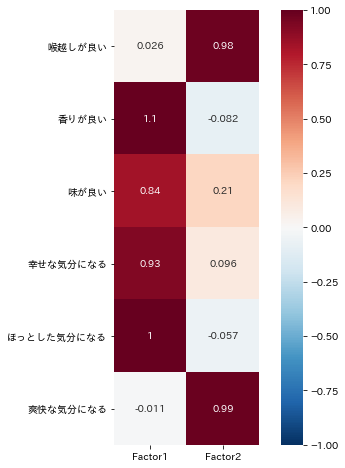

In [28]:
import seaborn as sns
column = df2.columns
plt.figure(figsize=(8, 8))
sns.heatmap(data=fa_promax.loadings_,
                square=True, vmax=1, vmin=-1, center=0, annot=True,
            cmap='RdBu_r',yticklabels=column, xticklabels=["Factor1","Factor2"])

別の可視化の方法もあります．```style.background_gradient```を使って，色付けしています．エクセルみたいな感じですね．詳しい使い方は[こちら](http://sinhrks.hatenablog.com/entry/2015/11/22/202640)．```light_palette```で色の指定をしています．色のパターンは[こちら](https://qiita.com/SaitoTsutomu/items/c79c9973a92e1e2c77a7)を参考にしてください，たくさんあります．

In [27]:
column = df2.columns
result_promax = pd.DataFrame(fa_promax.loadings_, index = column, columns = ["Factor1","Factor2"])
cm = sns.light_palette("skyblue", as_cmap=True)
result_promax.style.background_gradient(cmap=cm)

,Factor1,Factor2
喉越しが良い,0.026149,0.980550
香りが良い,1.050007,-0.082207
味が良い,0.838436,0.214016
幸せな気分になる,0.927367,0.095986
ほっとした気分になる,1.027922,-0.056524
爽快な気分になる,-0.011071,0.988151


### バリマックス回転 ver.

回転することで結果が解釈しやすくなるのです．実はこの2つ以外にもたくさんあります．
- プロマックス回転
 - 斜交回転
 - 因子同士に相関があると仮定
- バリマックス回転
 - 直交回転
 - 因子同士は無相関であると仮定

コードに関しては```rotation='promax'```から```rotation='varimax'```に変えるだけです．両方やってみます．

In [32]:
fa_varimax = FactorAnalyzer(n_factors = 2, rotation = 'varimax')
fa_varimax.fit(df_scaled)
fa_varimax.loadings_

array([[0.37282745, 0.92566914],
       [0.95572182, 0.28707959],
       [0.8624863 , 0.49065596],
       [0.90397957, 0.41114584],
       [0.9441287 , 0.30343318],
       [0.34061465, 0.91987413]])

In [33]:
column = df2.columns
result_varimax = pd.DataFrame(fa_varimax.loadings_, index = column, columns = ["Factor1","Factor2"])
cm = sns.light_palette("skyblue", as_cmap=True)
result_varimax.style.background_gradient(cmap=cm)

,Factor1,Factor2
喉越しが良い,0.372827,0.925669
香りが良い,0.955722,0.287080
味が良い,0.862486,0.490656
幸せな気分になる,0.903980,0.411146
ほっとした気分になる,0.944129,0.303433
爽快な気分になる,0.340615,0.919874


## 4. 結果の解釈：知覚マップ作成
### 4.1. 因子得点の算出

```transform```で各商品の因子得点を出力することが出来ます．各商品の因子得点をプロットしたものが知覚マップになります．

- プロマックス回転

In [34]:
# 因子得点の算出
score_promax = fa_promax.transform(df_scaled)
score_promax

array([[-0.25899664,  1.55847837],
       [ 0.22155464, -0.14818079],
       [ 1.00420867,  1.06150637],
       [ 0.21797597, -0.30901959],
       [ 1.51964905,  0.41969512],
       [ 1.46543682,  0.99139596],
       [-1.05192273, -0.98138956],
       [-1.0202764 , -0.05678689],
       [-0.93541787, -0.57660508],
       [-1.16221151, -1.9590939 ]])

見やすくするために，データフレームの型にしていきます．その名の通り```DataFrame()```という関数を使います．詳しくは[こちら](https://note.nkmk.me/python-pandas-dataframe-values-columns-index/)から．

In [35]:
df_promax = pd.DataFrame(score_promax, columns=['Factor1','Factor2'])

商品名も加えていきます．データフレーム同士を結合する際には，```concat()```という関数を使用します．詳細は[こちら](https://note.nkmk.me/python-pandas-concat/)を参照してください．列方向に結合するので，```axis = 1```です．

In [40]:
df_promax2 = pd.concat([df['商品名'], df_promax], axis=1)
df_promax2

,商品名,Factor1,Factor2
0,アサヒスーパードライ,-0.258997,1.558478
1,キリンラガービール,0.221555,-0.148181
2,キリン一番絞り,1.004209,1.061506
3,サッポロ生ビール黒ラベル,0.217976,-0.309020
4,エビスビール,1.519649,0.419695
5,サントリー・ザ・プレミアムモルツ,1.465437,0.991396
6,アサヒ本生ドラフト,-1.051923,-0.981390
7,麒麟淡麗<生>,-1.020276,-0.056787
8,キリンのどごし,-0.935418,-0.576605
9,サントリー金麦,-1.162212,-1.959094


- バリマックス回転

In [41]:
score_varimax = fa_varimax.transform(df_scaled)
df_varimax = pd.DataFrame(score_varimax, columns = ["Factor1", "Factor2"])
df_varimax2 = pd.concat([df.商品名, df_varimax], axis = 1)
df_varimax2

,商品名,Factor1,Factor2
0,アサヒスーパードライ,-1.037856,2.061573
1,キリンラガービール,0.342914,-0.288821
2,キリン一番絞り,0.757312,0.847790
3,サッポロ生ビール黒ラベル,0.412435,-0.487298
4,エビスビール,1.691695,-0.193850
5,サントリー・ザ・プレミアムモルツ,1.361572,0.543177
6,アサヒ本生ドラフト,-0.853328,-0.725599
7,麒麟淡麗<生>,-1.239246,0.410150
8,キリンのどごし,-0.894972,-0.276752
9,サントリー金麦,-0.540525,-1.890371


### 4.2. 知覚マップ作成

```plt.text()```でテキストをグラフに表示することが出来ます．()の中身は(x軸の値, y軸の値, プロットしたい文字列)です．詳しい使い方は[こちら](https://www.yutaka-note.com/entry/2020/01/08/080413)から．行と列の指定をする際には，```iloc```関数を使います．[このサイト](https://kojimanotech.com/2019/08/08/174/)で詳しく説明されています．

- プロマックス回転


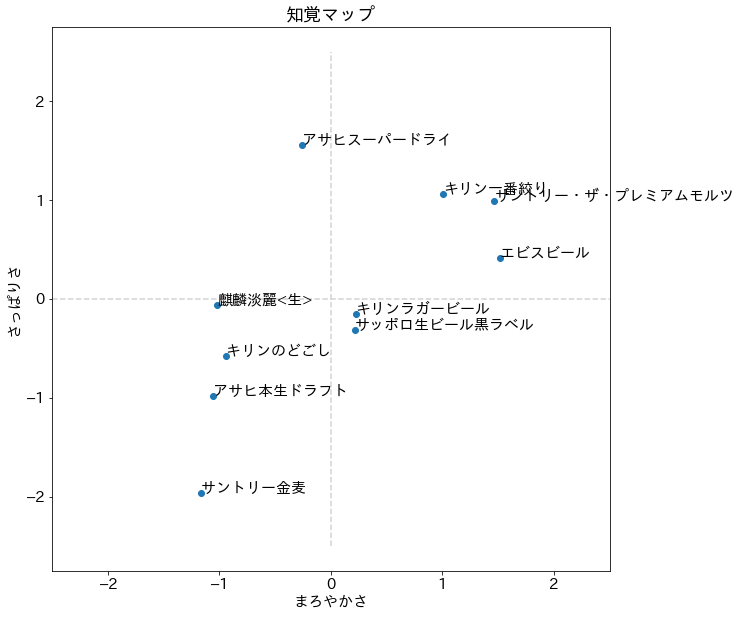

In [64]:
plt.figure(figsize=(10,10))
plt.rcParams["font.size"] = 15
plt.scatter(df_promax.Factor1, df_promax.Factor2)
plt.title('知覚マップ')
plt.xlabel('まろやかさ')
plt.ylabel('さっぱりさ')
plt.xlim(-2.5, 2.5)
plt.xlim(-2.5, 2.5)
plt.hlines([0], -2.5,2.5, 'lightgray', linestyle='--')
plt.vlines([0], -2.5,2.5, 'lightgray', linestyle='--')

for i in range(len(df_promax)):
    plt.text(df_promax2.iloc[i,1], df_promax2.iloc[i,2], df_promax2.iloc[i,0])

### - バリマックス回転

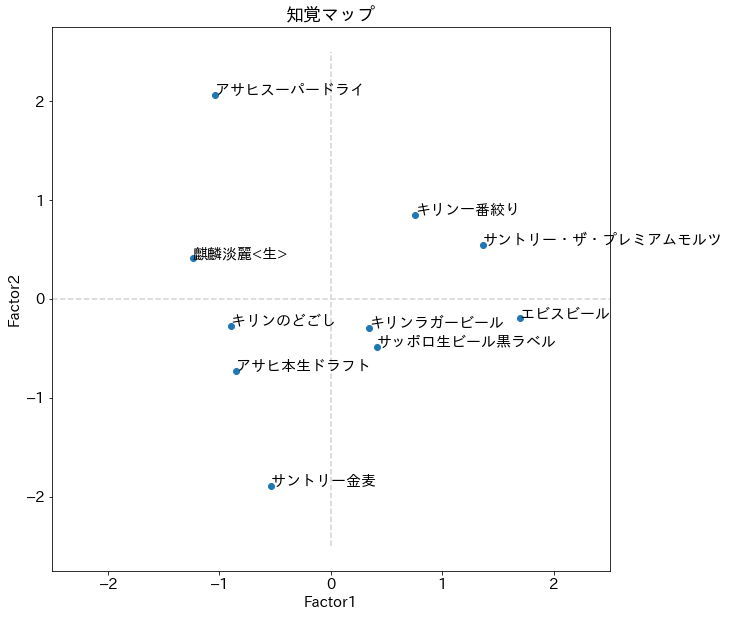

In [63]:
plt.figure(figsize=(10,10))
plt.rcParams["font.size"] = 15
plt.scatter(df_varimax.Factor1, df_varimax.Factor2)
plt.title('知覚マップ')
plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.xlim(-2.5, 2.5)
plt.xlim(-2.5, 2.5)
plt.hlines([0], -2.5,2.5, 'lightgray', linestyle='--')
plt.vlines([0], -2.5,2.5, 'lightgray', linestyle='--')

for i in range(len(df_varimax)):
    plt.text(df_varimax2.iloc[i,1], df_varimax2.iloc[i,2], df_varimax2.iloc[i,0])

### よく出てくるfig, axを使って書いてみる
上の書き方との対応関係をみると理解が深まるかもしれません。[このサイト](https://qiita.com/kenichiro_nishioka/items/8e307e164a4e0a279734)にわかりやすくまとまっています．

In [ ]:
fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.5, 2.5])
ax.plot(df_varimax2.Factor1, df_varimax2.Factor2, "o")
ax.set_xlabel('Factor1', size = 15)
ax.set_ylabel('Factor2', size = 15)
ax.set_title('Perceptual Mapping: varimax', size = 20)
ax.axhline(0, ls = '--', color = 'lightgray')
ax.axvline(0, ls = '--', color = 'lightgray')

for i in range(len(df_varimax2)) :
    ax.text(df_varimax2.iloc[i,1],df_varimax2.iloc[i,2],df_varimax2.iloc[i,0], size = 15)

## Groupwork: 15~20min
1. それぞれの因子(Factor1, Factor2)に名前をつけてみましょう．ここでマーケターのセンスが問われます．
2. みなさんはキリンのマーケティングコンサルを依頼されました．依頼内容としては，自社商品の新しいプロモーションを提案してほしいとのことです（既存のプロモーションの改善もOK）．考えていく上で，知覚マップ以外にどのようなデータ＆分析手法が追加で必要になりそうかなど議論を自由に膨らませてみてください！